# Calcolo BMI

In [4]:
import pandas as pd
import numpy as np

# --- 1. Caricamento Dati ---
input_file = 'db_missforest.csv'
output_file = 'db_bmi.csv'

try:
    df = pd.read_csv(input_file)
    print(f"File '{input_file}' caricato con successo.")
except FileNotFoundError:
    print(f"ERRORE: File '{input_file}' non trovato.")
    exit()
except Exception as e:
    print(f"Errore nel caricamento: {e}")
    exit()

# Partiamo con una copia del DataFrame
df_final = df.copy()

# --- 2. Aggiunta Colonne Vuote ---
print("Aggiunta delle nuove colonne 'bmi_value' e 'bmi_result'...")

# Aggiungiamo le colonne inizializzandole con 'Not a Number' (valore nullo)
df_final['bmi_value'] = np.nan
df_final['bmi_result'] = np.nan


# --- 3. Salvataggio su CSV ---
print("Salvataggio in corso...")
try:
    df_final.to_csv(output_file, index=False)
    
    print("\n============================================")
    print(f"--- SALVATAGGIO COMPLETATO ---")

except Exception as e:
    print(f"\n--- ERRORE NEL SALVATAGGIO ---")
    print(f"Si è verificato un errore durante il salvataggio: {e}")

File 'db_missforest.csv' caricato con successo.
Aggiunta delle nuove colonne 'bmi_value' e 'bmi_result'...
Salvataggio in corso...

--- SALVATAGGIO COMPLETATO ---


- calcolo del bmi

In [10]:
import pandas as pd
import numpy as np

# --- 1. Caricamento Dati ---
file_name = 'db_bmi.csv'

try:
    df = pd.read_csv(file_name)
    print(f"File '{file_name}' caricato con successo.")
except FileNotFoundError:
    print(f"ERRORE: File '{file_name}' non trovato.")
    exit() # Esce dallo script se il file non c'è
except Exception as e:
    print(f"Errore nel caricamento: {e}")
    exit() # Esce per qualsiasi altro errore di caricamento

# --- 2. Calcolo 'bmi_value' ---
print("Calcolo BMI in corso...")

# Formula BMI: peso (kg) / (altezza_in_metri)^2
# Convertiamo l'altezza da cm a m (dividendo per 100)
df['bmi_value'] = df['weight'] / ((df['height'] / 100) ** 2)

# Arrotondiamo il risultato a 2 cifre decimali
df['bmi_value'] = df['bmi_value'].round(1)

print("Calcolo BMI completato e valori arrotondati.")
print(f"Valore BMI per la prima riga: {df.loc[0, 'bmi_value']}")


# --- 3. Salvataggio su CSV (Sovrascrittura) ---
print(f"Salvataggio dei dati aggiornati in '{file_name}'...")
try:
    # Salviamo il file sovrascrivendo quello vecchio
    # float_format='%.2f' assicura che il BMI sia salvato con 2 decimali
    df.to_csv(file_name, index=False, float_format='%.2f')
    
    print("\n============================================")
    print(f"--- SALVATAGGIO COMPLETATO ---")
    print(f"File '{file_name}' aggiornato con successo.")
    print("\n--- Prime 5 righe del file aggiornato ---")
    print(df.head())
    print("\n--- Controllo colonna 'bmi_value' ---")
    # Mostra statistiche (min, max, media) per la colonna calcolata
    print(df['bmi_value'].describe())
    print("\n--- Controllo colonna 'bmi_result' (dovrebbe essere ancora vuota) ---")
    print(df['bmi_result'].isnull().sum(), "valori nulli in 'bmi_result'")
    print("============================================")

except Exception as e:
    print(f"\n--- ERRORE NEL SALVATAGGIO ---")
    print(f"Si è verificato un errore durante il salvataggio: {e}")

File 'db_bmi.csv' caricato con successo.
Calcolo BMI in corso...
Calcolo BMI completato e valori arrotondati.
Valore BMI per la prima riga: 24.5
Salvataggio dei dati aggiornati in 'db_bmi.csv'...

--- SALVATAGGIO COMPLETATO ---
File 'db_bmi.csv' aggiornato con successo.

--- Prime 5 righe del file aggiornato ---
   patient_id  sex   age  height  weight  \
0     15709.0    1  56.0   160.5    63.0   
1     13243.0    0  19.0   174.0    70.0   
2     20372.0    1  37.0   165.5    69.0   
3     17014.0    0  24.0   176.0    82.0   
4     17448.0    1  19.0   165.9    70.0   

                                  scp_codes   NORM  LVOLT   SR  SBRAD  ...  \
0  {'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}  100.0    0.0  0.0    0.0  ...   
1              {'NORM': 80.0, 'SBRAD': 0.0}   80.0    0.0  0.0    0.0  ...   
2                {'NORM': 100.0, 'SR': 0.0}  100.0    0.0  0.0    0.0  ...   
3                {'NORM': 100.0, 'SR': 0.0}  100.0    0.0  0.0    0.0  ...   
4                {'NORM': 100.0

In [13]:
import pandas as pd

# --- 1. Caricamento Dati ---
# Usiamo l'ultimo file che abbiamo creato
file_name = 'db_bmi.csv' 

try:
    df = pd.read_csv(file_name)
    print(f"File '{file_name}' caricato con successo.")
except FileNotFoundError:
    print(f"ERRORE: File '{file_name}' non trovato.")
    exit()
except Exception as e:
    print(f"Errore nel caricamento: {e}")
    exit()

# --- 2. Calcolo Pazienti < 18 ---
print("Calcolo in corso...")

colonna_eta = 'age'
eta_limite = 18

# Applica il filtro booleano e somma i risultati
# (True viene contato come 1, False come 0)
conteggio_minori = (df[colonna_eta] < eta_limite).sum()

# --- 3. Stampa Risultato ---
print("\n============================================")
print(f"Numero totale di pazienti con età MINORE di {eta_limite} anni: {conteggio_minori}")
print("============================================")

File 'db_bmi.csv' caricato con successo.
Calcolo in corso...

Numero totale di pazienti con età MINORE di 18 anni: 118


- risultati del bmi

In [16]:
import pandas as pd
import numpy as np

# --- 1. Definizione della Funzione di Classificazione ---

def classify_bmi_by_age_sex(row):
    """
    Classifica il BMI in base a età e sesso, seguendo la tabella fornita.
    """
    age = row['age']
    sex = row['sex']
    bmi = row['bmi_value']

    # --- REGOLA 0: Gestione dati mancanti ---
    # Se uno dei valori chiave manca, non possiamo classificare
    if pd.isna(age) or pd.isna(sex) or pd.isna(bmi):
        return np.nan

    # --- REGOLA 1: Pazienti < 18 anni ---
    if age < 18:
        return "-"

    # --- REGOLA 2: UOMO (sex == 0) ---
    if sex == 0:
        if 18 <= age <= 24:
            if bmi < 19: return "Sottopeso"
            if 19 <= bmi < 24.1: return "Normopeso"
            if 24.1 <= bmi < 29: return "Sovrappeso"
            if bmi >= 29: return "Obeso"
        elif 25 <= age <= 34:
            if bmi < 20: return "Sottopeso"
            if 20 <= bmi < 25.1: return "Normopeso"
            if 25.1 <= bmi < 30: return "Sovrappeso"
            if bmi >= 30: return "Obeso"
        elif 35 <= age <= 44:
            if bmi < 21: return "Sottopeso"
            if 21 <= bmi < 26.1: return "Normopeso"
            if 26.1 <= bmi < 31: return "Sovrappeso"
            if bmi >= 31: return "Obeso"
        elif 45 <= age <= 54:
            if bmi < 22: return "Sottopeso"
            if 22 <= bmi < 27.1: return "Normopeso"
            if 27.1 <= bmi < 32: return "Sovrappeso"
            if bmi >= 32: return "Obeso"
        elif 55 <= age <= 64:
            if bmi < 23: return "Sottopeso"
            if 23 <= bmi < 28.1: return "Normopeso"
            if 28.1 <= bmi < 33: return "Sovrappeso"
            if bmi >= 33: return "Obeso"
        elif age >= 65:
            if bmi < 24: return "Sottopeso"
            if 24 <= bmi < 29.1: return "Normopeso"
            if 29.1 <= bmi < 33: return "Sovrappeso"
            if bmi >= 33: return "Obeso"

    # --- REGOLA 3: DONNA (sex == 1) ---
    elif sex == 1:
        if 18 <= age <= 24:
            if bmi < 18: return "Sottopeso"
            if 18 <= bmi < 23.1: return "Normopeso"
            if 23.1 <= bmi < 28: return "Sovrappeso"
            if bmi >= 28: return "Obeso"
        elif 25 <= age <= 34:
            if bmi < 19: return "Sottopeso"
            if 19 <= bmi < 24.1: return "Normopeso"
            if 24.1 <= bmi < 29.1: return "Sovrappeso"
            if bmi >= 29.1: return "Obeso"
        elif 35 <= age <= 44:
            if bmi < 20: return "Sottopeso"
            if 20 <= bmi < 25.1: return "Normopeso"
            if 25.1 <= bmi < 30.1: return "Sovrappeso"
            if bmi >= 30.1: return "Obeso"
        elif 45 <= age <= 54:
            if bmi < 21: return "Sottopeso"
            if 21 <= bmi < 26.1: return "Normopeso"
            if 26.1 <= bmi < 31.1: return "Sovrappeso"
            if bmi >= 31.1: return "Obeso"
        elif 55 <= age <= 64:
            if bmi < 22: return "Sottopeso"
            if 22 <= bmi < 27.1: return "Normopeso"
            if 27.1 <= bmi < 32.1: return "Sovrappeso"
            if bmi >= 32.1: return "Obeso"
        elif age >= 65:
            if bmi < 23: return "Sottopeso"
            if 23 <= bmi < 28.1: return "Normopeso"
            if 28.1 <= bmi < 33.1: return "Sovrappeso"
            if bmi >= 33.1: return "Obeso"
    
    # Fallback nel caso il sesso non sia 0 o 1
    return np.nan

# --- SCRIPT PRINCIPALE ---

# --- 2. Caricamento Dati ---
file_name = 'db_bmi.csv'
try:
    df = pd.read_csv(file_name)
    print(f"File '{file_name}' caricato con successo.")
except FileNotFoundError:
    print(f"ERRORE: File '{file_name}' non trovato.")
    exit()
except Exception as e:
    print(f"Errore nel caricamento: {e}")
    exit()

# --- 3. Applicazione della Funzione ---
print("Applicazione della logica di classificazione BMI (può richiedere tempo)...")

# 'axis=1' dice a pandas di applicare la funzione a ogni RIGA
df['bmi_result'] = df.apply(classify_bmi_by_age_sex, axis=1)

print("Classificazione completata.")

# --- 4. Salvataggio su CSV (Sovrascrittura) ---
print(f"Salvataggio dei dati aggiornati in '{file_name}'...")
try:
    df.to_csv(file_name, index=False, float_format='%.2f')
    
    print("\n============================================")
    print(f"--- SALVATAGGIO COMPLETATO ---")
    print(f"File '{file_name}' aggiornato con successo.")
    
    print("\n--- Distribuzione dei risultati BMI ('bmi_result') ---")
    # Mostra i conteggi per ogni categoria creata
    print(df['bmi_result'].value_counts(dropna=False).sort_index())
    
    print("\n--- Esempio di righe (prime 10) ---")
    print(df[['age', 'sex', 'bmi_value', 'bmi_result']].head(10))
    print("============================================")

except Exception as e:
    print(f"\n--- ERRORE NEL SALVATAGGIO ---")
    print(f"Si è verificato un errore durante il salvataggio: {e}")

File 'db_bmi.csv' caricato con successo.
Applicazione della logica di classificazione BMI (può richiedere tempo)...
Classificazione completata.
Salvataggio dei dati aggiornati in 'db_bmi.csv'...

--- SALVATAGGIO COMPLETATO ---
File 'db_bmi.csv' aggiornato con successo.

--- Distribuzione dei risultati BMI ('bmi_result') ---
bmi_result
-               118
Normopeso     12610
Obeso           656
Sottopeso      2110
Sovrappeso     3375
Name: count, dtype: int64

--- Esempio di righe (prime 10) ---
    age  sex  bmi_value  bmi_result
0  56.0    1       24.5   Normopeso
1  19.0    0       23.1   Normopeso
2  37.0    1       25.2  Sovrappeso
3  24.0    0       26.5  Sovrappeso
4  19.0    1       25.4  Sovrappeso
5  18.0    1       20.9   Normopeso
6  54.0    0       26.8   Normopeso
7  48.0    0       30.3  Sovrappeso
8  55.0    0       23.7   Normopeso
9  22.0    1       20.3   Normopeso


## Rappresentazioni grafiche (da scegliere)

- numero di pazienti per bmi_result

File 'db_bmi.csv' caricato con successo.
Creazione grafico in corso...


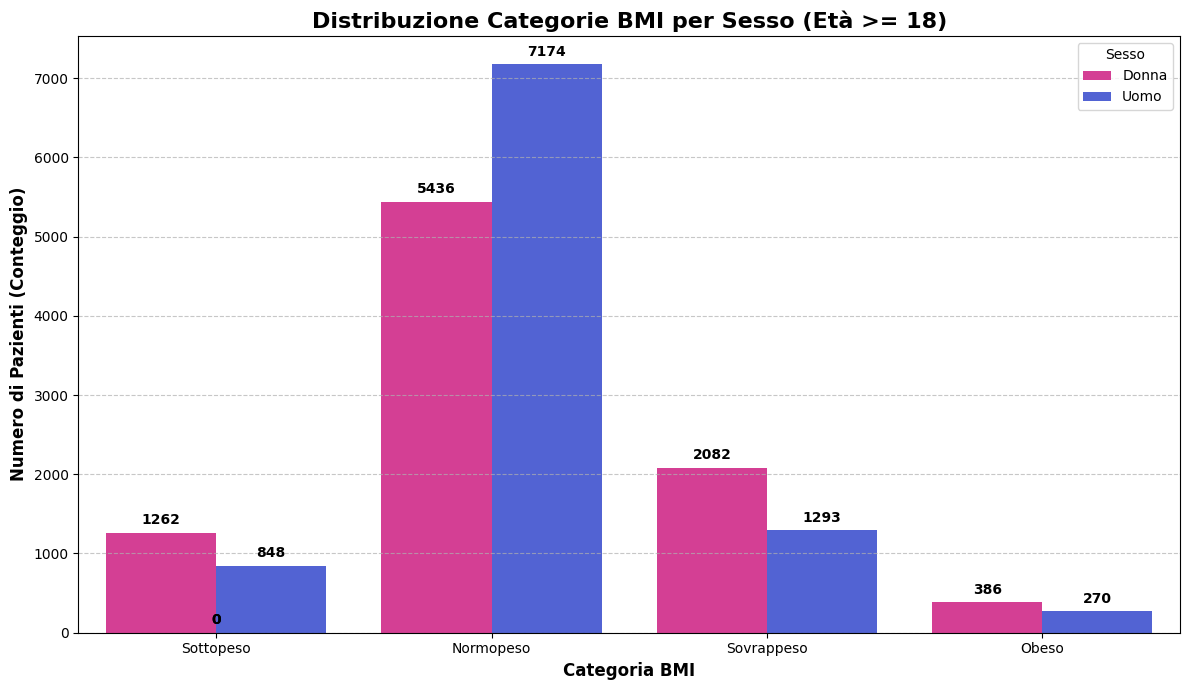

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Caricamento Dati ---
file_name = 'db_bmi.csv'
try:
    df = pd.read_csv(file_name)
    print(f"File '{file_name}' caricato con successo.")
except FileNotFoundError:
    print(f"ERRORE: File '{file_name}' non trovato.")
    exit()
except Exception as e:
    print(f"Errore nel caricamento: {e}")
    exit()

# --- 2. Preparazione per il Grafico ---

# Mappiamo i valori numerici del sesso (0, 1) a etichette più chiare
df['sex_label'] = df['sex'].map({0: 'Uomo', 1: 'Donna'})

# Definiamo l'ordine desiderato per le categorie sull'asse X
# (Ignoriamo i valori nulli e gli under 18 ("-"))
category_order = [
    'Sottopeso',
    'Normopeso',
    'Sovrappeso',
    'Obeso'
]

# Definiamo una palette di colori
color_palette = {
    'Uomo': '#3c53e8',
    'Donna': '#ed2697'
}

print("Creazione grafico in corso...")

# --- 3. Creazione Grafico ---
plt.figure(figsize=(12, 7))

# Usiamo sns.countplot()
# 'x' = la nostra categoria principale (il risultato BMI)
# 'hue' = la variabile per cui raggruppare (Uomo/Donna)
# 'order' = forza l'ordine delle barre sull'asse X
# 'palette' = usa i nostri colori personalizzati
ax = sns.countplot(
    data=df,
    x='bmi_result',
    hue='sex_label',
    order=category_order, 
    palette=color_palette
)


# --- 4. Personalizzazione ---
plt.title('Distribuzione Categorie BMI per Sesso (Età >= 18)', fontsize=16, weight='bold')
plt.xlabel('Categoria BMI', fontsize=12, weight='bold')
plt.ylabel('Numero di Pazienti (Conteggio)', fontsize=12, weight='bold')
plt.legend(title='Sesso', loc='upper right')

# Aggiungiamo le etichette con il conteggio sopra ogni barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                weight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# --- 5. Mostra Grafico ---
plt.show()

File 'db_bmi.csv' caricato con successo.

--- Conteggi usati per il Grafico Radar ---
bmi_result  Sottopeso  Normopeso  Sovrappeso  Obeso
sex_label                                          
Donna            1262       5436        2082    386
Uomo              848       7174        1293    270
------------------------------------------
Creazione grafico radar...
Grafico salvato con successo come 'distribuzione_radar.png'


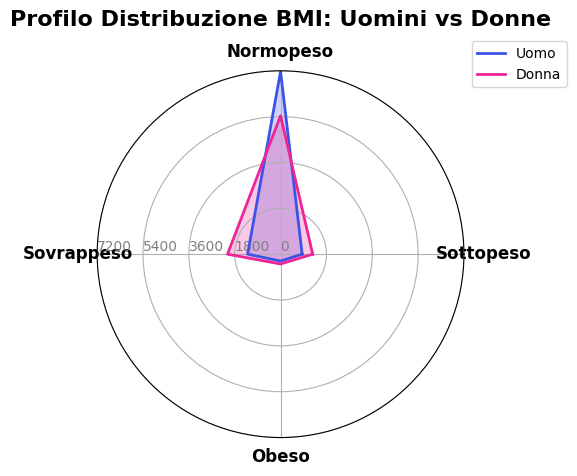

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Caricamento Dati ---
file_name = 'db_bmi.csv'
output_plot_file = 'distribuzione_radar.png'

try:
    df = pd.read_csv(file_name)
    print(f"File '{file_name}' caricato con successo.")
except FileNotFoundError:
    print(f"ERRORE: File '{file_name}' non trovato.")
    exit()
except Exception as e:
    print(f"Errore nel caricamento: {e}")
    exit()

# --- 2. Preparazione Dati ---

# Filtriamo i pazienti con categorie valide (escludendo <18 e valori nulli)
valid_categories = ['Sottopeso', 'Normopeso', 'Sovrappeso', 'Obeso']
df_filtered = df[
    (df['bmi_result'].isin(valid_categories)) & 
    (df['sex'].isin([0, 1]))
].copy()

# Mappiamo i valori numerici del sesso (0, 1) a etichette
df_filtered['sex_label'] = df_filtered['sex'].map({0: 'Uomo', 1: 'Donna'})

# --- 3. Calcolo dei Conteggi (il "cuore" del grafico) ---

# Usiamo crosstab per ottenere una tabella di conteggi:
# Righe = Sesso, Colonne = Categoria BMI
data_counts = pd.crosstab(df_filtered['sex_label'], df_filtered['bmi_result'])

# Riordiniamo le colonne nell'ordine che vogliamo per il radar
data_counts = data_counts[valid_categories]

print("\n--- Conteggi usati per il Grafico Radar ---")
print(data_counts)
print("------------------------------------------")

# Estraiamo i valori (conteggi) per Uomo e Donna
values_uomo = data_counts.loc['Uomo'].tolist()
values_donna = data_counts.loc['Donna'].tolist()

# Estraiamo il numero massimo per impostare il limite dell'asse Y
max_val = data_counts.max().max()
# Arrotondiamo per eccesso al centinaio più vicino per un grafico pulito
max_limit = (np.ceil(max_val / 100) * 100)


# --- 4. Preparazione Assi e Angoli per il Grafico ---
labels = valid_categories
num_vars = len(labels)

# Calcoliamo gli angoli per ogni asse (raggi)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# CHIUDIAMO IL CERCHIO: Il grafico deve tornare al punto di partenza
values_uomo += values_uomo[:1]
values_donna += values_donna[:1]
angles += angles[:1]


# --- 5. Creazione Grafico ---
print("Creazione grafico radar...")

# ==========================================================
# === INIZIO BLOCCO MODIFICATO: PALETTE COLORI ===
# ==========================================================
color_palette = {
    'Uomo': '#3c53e8',
    'Donna': '#ed2697'
}
# ==========================================================
# === FINE BLOCCO MODIFICATO ===
# ==========================================================


# Inizializziamo il grafico in modalità "polare"
fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))

# Disegniamo l'area per gli UOMINI (con la nuova palette)
ax.plot(angles, values_uomo, color=color_palette['Uomo'], linewidth=2, linestyle='solid', label='Uomo')
ax.fill(angles, values_uomo, color=color_palette['Uomo'], alpha=0.25)

# Disegniamo l'area per le DONNE (con la nuova palette)
ax.plot(angles, values_donna, color=color_palette['Donna'], linewidth=2, linestyle='solid', label='Donna')
ax.fill(angles, values_donna, color=color_palette['Donna'], alpha=0.25)


# --- 6. Personalizzazione ---

# Impostiamo le etichette degli assi (i raggi)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, size=12, weight='bold')

# Impostiamo le etichette per i valori (i cerchi concentrici)
ax.set_rlabel_position(180) # Posiziona etichette numeriche a sinistra
ax.set_yticks(np.linspace(0, max_limit, 5)) # Mostra 5 tacche da 0 al max
ax.set_yticklabels(np.linspace(0, max_limit, 5, dtype=int), color="grey", size=10)
ax.set_ylim(0, max_limit) # Fissa il limite massimo

# Aggiungiamo Titolo e Legenda
plt.title('Profilo Distribuzione BMI: Uomini vs Donne', size=16, weight='bold', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))


# --- 7. Salvataggio e Visualizzazione ---
try:
    plt.tight_layout()
    plt.savefig(output_plot_file, bbox_inches='tight') 
    print(f"Grafico salvato con successo come '{output_plot_file}'")
    plt.show()
    
except Exception as e:
    print(f"Errore durante il salvataggio o la visualizzazione: {e}")

- bmi_rsult per fasce d'età >= 18

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
File 'db_bmi.csv' caricato con successo.
Creazione grafico in corso...


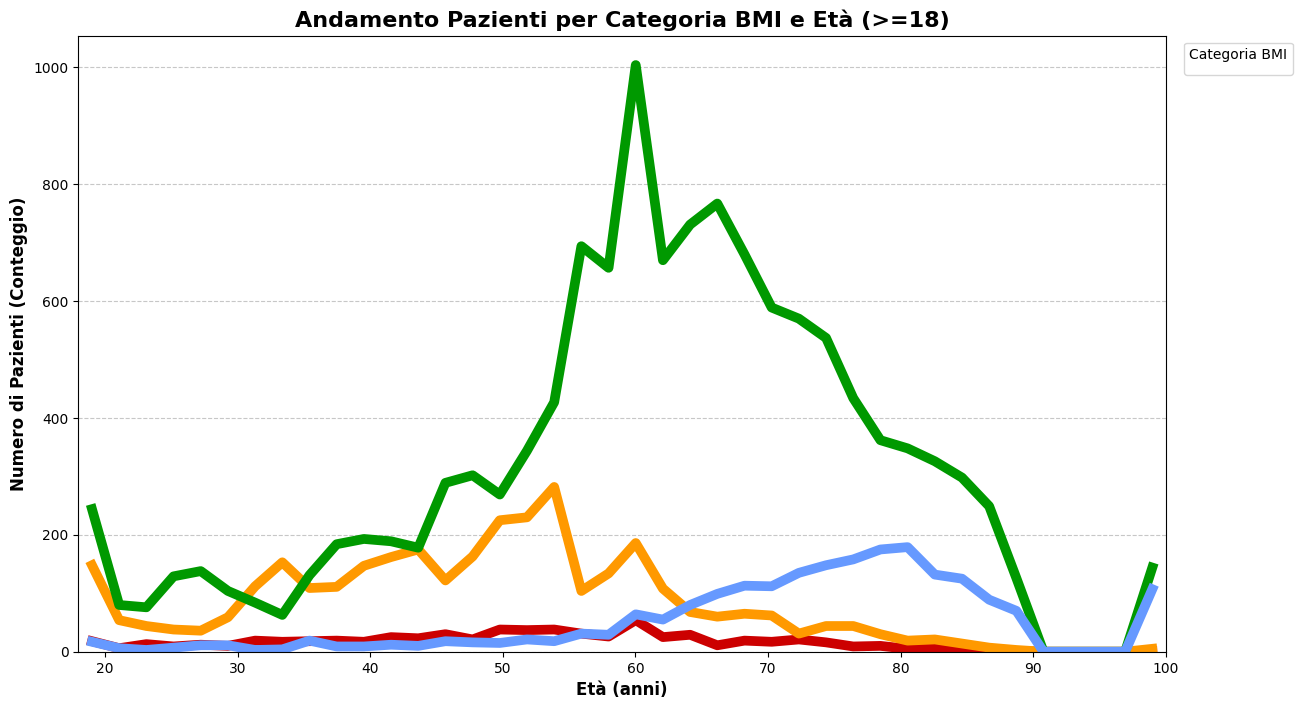

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Caricamento Dati ---
file_name = 'db_bmi.csv'
try:
    df = pd.read_csv(file_name)
    print(f"File '{file_name}' caricato con successo.")
except FileNotFoundError:
    print(f"ERRORE: File '{file_name}' non trovato.")
    exit()
except Exception as e:
    print(f"Errore nel caricamento: {e}")
    exit()

# --- 2. Preparazione per il Grafico ---

# Definiamo l'ordine e le categorie desiderate
valid_categories = ['Sottopeso', 'Normopeso', 'Sovrappeso', 'Obeso']

# Definiamo una palette di colori leggibile per le 4 categorie
line_colors = {
    'Sottopeso': '#6699ff',  
    'Normopeso': '#009900',  
    'Sovrappeso': '#ff9900',
    'Obeso': '#cc0000'      
}

# Filtriamo il DataFrame
df_plot = df[
    (df['age'] >= 18) &
    (df['bmi_result'].isin(valid_categories))
].copy()

print("Creazione grafico in corso...")

# --- 3. Creazione Grafico ---
# Impostiamo una figura più larga per fare spazio alla legenda
plt.figure(figsize=(15, 8)) 

ax = sns.histplot(
    data=df_plot,
    x='age',
    hue='bmi_result',
    hue_order=valid_categories,
    palette=line_colors,
    element='poly',  
    fill=False,      
    bins=40,         
    linewidth=7
)

# --- 4. Personalizzazione ---
plt.title('Andamento Pazienti per Categoria BMI e Età (>=18)', fontsize=16, weight='bold')
plt.xlabel('Età (anni)', fontsize=12, weight='bold')
plt.ylabel('Numero di Pazienti (Conteggio)', fontsize=12, weight='bold')

plt.xlim(18, 100)
plt.ylim(bottom=0) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

# ==========================================================
# === INIZIO BLOCCO MODIFICATO: LEGENDA ===
# ==========================================================

# Spostiamo la legenda "a fianco" (fuori dagli assi)
# loc='upper left' si riferisce all'angolo della *legenda*
# bbox_to_anchor=(1.01, 1) posiziona quell'angolo
# al 101% della larghezza (x=1.01) e al 100% dell'altezza (y=1) degli assi.
plt.legend(
    title='Categoria BMI', 
    loc='upper left', 
    bbox_to_anchor=(1.01, 1)
)

# ==========================================================
# === FINE BLOCCO MODIFICATO ===
# ==========================================================

# tight_layout() spesso non gestisce bene le legende esterne
# Potrebbe essere necessario commentarlo o aggiustare fig.subplots_adjust
# plt.tight_layout() # Proviamo a tenerlo, ma se taglia la legenda va rimosso

# --- 5. Mostra Grafico ---
# Aggiungiamo un aggiustamento manuale per fare spazio
plt.subplots_adjust(right=0.85) # Lascia spazio sulla destra (es. 15%)

plt.show()

Un frammento di linea blu (#0072B2) accanto alla scritta "Sottopeso"

Un frammento di linea verde (#009E73) accanto alla scritta "Normopeso"

Un frammento di linea arancione (#D55E00) accanto alla scritta "Sovrappeso"

Un frammento di linea magenta (#CC79A7) accanto alla scritta "Obeso"

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=247b8f4a-5d0c-407e-bcc1-03b5acbab0dd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>